In [0]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file

File_ID = '1-kn-3zNuUZmArm0cIOeDTFMoU_GX4ieB'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('download.JPG')

# Sobel Operator

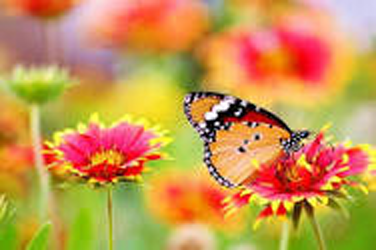

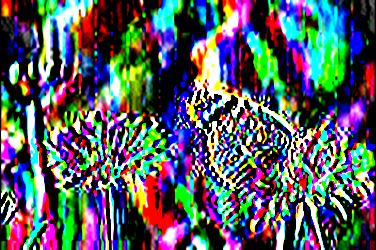

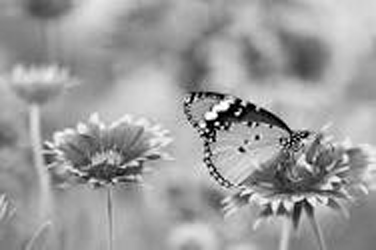

vertical sobel operator


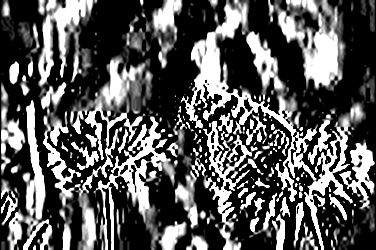

horizontal sobel operator


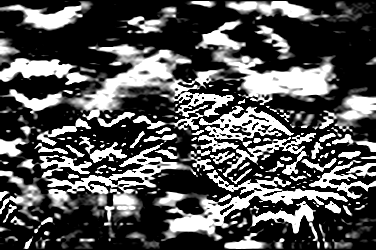

In [2]:
img=cv2.imread('download.JPG')
img=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
cv2_imshow(sobelx)

img=cv2.imread('download.JPG',0)
img=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
#img=cv2.resize(img,(250,250))
cv2_imshow(img)
vertical = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
print("vertical sobel operator")
cv2_imshow(vertical)

horizontal = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) 
print("horizontal sobel operator")
cv2_imshow(horizontal)

# Canny Edge Detection

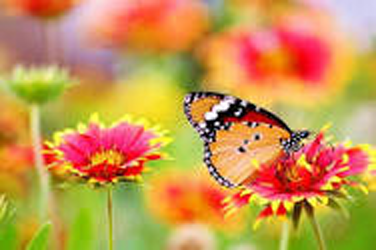

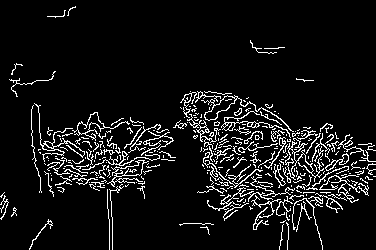

In [3]:
img=cv2.imread('download.JPG')
img=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)
canny = cv2.Canny(img,100,200)  # threshold= minval=100 maxval=200
cv2_imshow(canny)


# Hough Transform

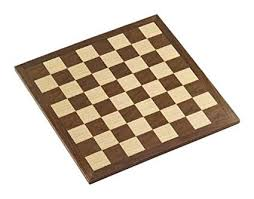

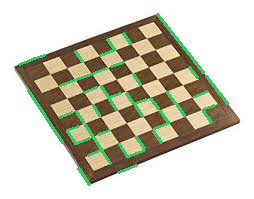

In [4]:

File_ID = '1qBlGf8q_uPv9k87H1zor9hUBKEmz7Z77'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('download (1).jpg')


img = cv2.imread('download (1).jpg')
gray = cv2.imread('download (1).jpg',0)
cv2_imshow(img)
edges = cv2.Canny(gray,50,150,apertureSize = 3)    #aperture=kernel size used

    
minLineLength = 100    #line segment
maxLineGap = 10        # allowed gap between two to treat them as single line
lines = cv2.HoughLinesP(edges,1,np.pi/270,50,minLineLength,maxLineGap)     #fourth argument is max threshold
lines=lines.reshape(lines.shape[0],lines.shape[2])
for x1,y1,x2,y2 in lines:
    cv2.line(img,(x1,y1),(x2,y2),(100,200,55),2)

cv2_imshow(img)


In [5]:
lines

array([[ 28,  90,  62, 142],
       [157,  14, 203,  72],
       [167,  92, 175, 103],
       [133,  74, 140,  84],
       [111,  66, 123,  62],
       [ 88, 155, 100, 150],
       [100,  55, 114,  50],
       [ 93, 105,  99, 115],
       [ 93, 137, 101, 149],
       [177, 105, 184, 115],
       [126,  93, 133, 103],
       [ 76, 111,  83, 122],
       [ 59, 117,  72, 112],
       [107,  39, 114,  49],
       [101,  86, 108,  97],
       [ 84,  92,  96,  87],
       [119, 144, 127, 156],
       [203, 109, 214, 105],
       [203, 111, 211, 122],
       [ 60,  85,  74,  80],
       [135, 103, 146,  99],
       [153, 131, 161, 142],
       [206,  76, 227, 103],
       [189,  67, 197,  77],
       [ 19,  64,  30,  60],
       [150,  98, 158, 108],
       [ 31,  59,  44,  55],
       [118, 172, 136, 165],
       [136, 137, 144, 148],
       [193,  97, 207,  91],
       [ 67, 130,  78, 126],
       [128, 156, 144, 150],
       [102, 151, 110, 163],
       [ 76, 143,  89, 138],
       [109,  

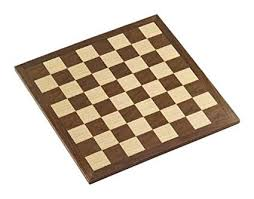

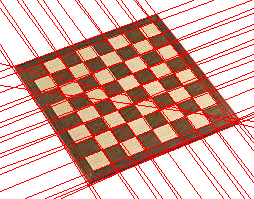

In [6]:
File_ID = '1qBlGf8q_uPv9k87H1zor9hUBKEmz7Z77'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('download (1).jpg')


img = cv2.imread('download (1).jpg')
gray = cv2.imread('download (1).jpg',0)
cv2_imshow(img)
edges = cv2.Canny(gray,50,150,apertureSize = 3)    #aperture=kernel size used


lines = cv2.HoughLines(edges,1,np.pi/90,50)    # second para=rho third para=theta
lines=lines.reshape(lines.shape[0],lines.shape[2])
for rho,theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),1)

cv2_imshow(img)   


In [7]:
lines

array([[  66.       ,    1.2217305],
       [ 177.       ,    1.1868238],
       [ -64.       ,    2.5132742],
       [ -18.       ,    2.5481806],
       [-115.       ,    2.4783676],
       [ 204.       ,    1.1868238],
       [  86.       ,    1.2217305],
       [ -47.       ,    2.5132742],
       [   0.       ,    2.5481806],
       [ 161.       ,    1.1868238],
       [ 100.       ,    1.2217305],
       [ 146.       ,    1.1868238],
       [ -81.       ,    2.5132742],
       [ -30.       ,    2.5132742],
       [  28.       ,    2.5481806],
       [ -92.       ,    2.4783676],
       [  73.       ,    1.2217305],
       [-108.       ,    2.4783676],
       [  23.       ,    2.5830872],
       [ 131.       ,    1.1868238],
       [ 193.       ,    1.1868238],
       [ -75.       ,    2.4783676],
       [ 114.       ,    1.2217305],
       [ -36.       ,    2.5481806],
       [ -14.       ,    2.5132742],
       [ 128.       ,    1.2217305],
       [ 206.       ,    1.1519173],
 